# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file D:\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file D:\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file D:\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-d

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q = "bitcoin AND 2021", language = "en")

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "ethereum AND 2021", language = "en")

In [55]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]

        btc_sentiments.append({"text": text, "date": date, "compound": compound, "positive": positive, "negative": negative, "neutral": neutral})
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ["date", "text", "compound", "positive", "neutral", "negative"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,neutral,negative
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.00
1,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.816,0.05
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.00
3,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.783,0.00
4,2021-05-12,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.929,0.00


In [56]:
# Create the Bitcoin sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]

        eth_sentiments.append({"text": text, "date": date, "compound": compound, "positive": positive, "negative": negative, "neutral": neutral})
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)

cols = ["date", "text", "compound", "positive", "neutral", "negative"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,neutral,negative
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.835,0.111
1,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.966,0.000
2,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,1.000,0.000
3,2021-05-03,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.000
4,2021-05-03,A representation of virtual currency Ethereum ...,0.0000,0.000,1.000,0.000


In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.286925,0.087700,0.893950,0.018350
std,0.426434,0.095067,0.102189,0.036977
min,-0.585900,0.000000,0.677000,0.000000
25%,0.000000,0.000000,0.821000,0.000000
50%,0.338900,0.064500,0.907500,0.000000
75%,0.642875,0.146000,1.000000,0.011750
max,0.845500,0.275000,1.000000,0.134000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,-0.024625,0.023150,0.951000,0.025850
std,0.255370,0.034562,0.053002,0.041599
min,-0.571900,0.000000,0.835000,0.000000
25%,-0.053600,0.000000,0.915000,0.000000
50%,0.000000,0.000000,0.958500,0.000000
75%,0.045025,0.050250,1.000000,0.066750
max,0.458800,0.097000,1.000000,0.111000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score with 0.0877

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score with 0.8455

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score with 0.2750

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [101]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'bitcoin', 'ethereum', 'crypto', 'cryptocurrency'}

# Define regex
regex = re.compile("[^a-zA-Z ]")

In [102]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
        
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the stop words
    tokens = [word for word in words if word not in sw.union(sw_addon)]
    
    return tokens

In [103]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.00,"[shares, square, today, american, fintech, com..."
1,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.816,0.05,"[image, tesla, tesla, stopped, accepting, paym..."
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.865,0.00,"[industry, whole, seen, momentous, year, growt..."
3,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.783,0.00,"[mark, zuckerberg, posted, picture, two, frank..."
4,2021-05-12,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.929,0.00,"[tesla, ceo, elon, musk, changed, stance, cryp..."


In [104]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.835,0.111,"[investors, call, disruptive, innovators, detr..."
1,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.966,0.000,"[venmo, jumping, aboard, bandwagonthe, social,..."
2,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,1.000,0.000,"[new, york, cnn, businessbitcoin, prices, cont..."
3,2021-05-03,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.000,"[reuters, stafffile, photo, representation, vi..."
4,2021-05-03,A representation of virtual currency Ethereum ...,0.0000,0.000,1.000,0.000,"[representation, virtual, currency, seen, fron..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
from collections import Counter
from nltk import ngrams

In [105]:
# Generate the Bitcoin N-grams where N=2
btc_processed = tokenizer(btc_df["text"].str.cat())
btc_bigrams = ngrams(btc_processed, n=2)
Counter(btc_bigrams).most_common(10)

[(('hit', 'record'), 4),
 (('ceo', 'elon'), 3),
 (('elon', 'musk'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'seen'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'illustration'), 3)]

In [106]:
# Generate the Ethereum N-grams where N=2
eth_processed = tokenizer(eth_df["text"].str.cat())
eth_bigrams = ngrams(eth_processed, n=2)
Counter(eth_bigrams).most_common(10)

[(('representation', 'virtual'), 7),
 (('virtual', 'currency'), 7),
 (('currency', 'seen'), 7),
 (('seen', 'front'), 7),
 (('front', 'stock'), 7),
 (('stock', 'graph'), 7),
 (('graph', 'illustration'), 7),
 (('illustration', 'taken'), 7),
 (('taken', 'february'), 6),
 (('february', 'reutersdado'), 6)]

In [64]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [107]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(btc_df["text"].str.cat()), 10)

[('musk', 6),
 ('company', 5),
 ('seen', 5),
 ('hit', 5),
 ('tesla', 4),
 ('march', 4),
 ('record', 4),
 ('currency', 4),
 ('ceo', 3),
 ('elon', 3)]

In [108]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df["text"].str.cat()), 10)

[('stock', 9),
 ('currency', 8),
 ('representation', 7),
 ('virtual', 7),
 ('seen', 7),
 ('front', 7),
 ('graph', 7),
 ('illustration', 7),
 ('taken', 7),
 ('reutersdado', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

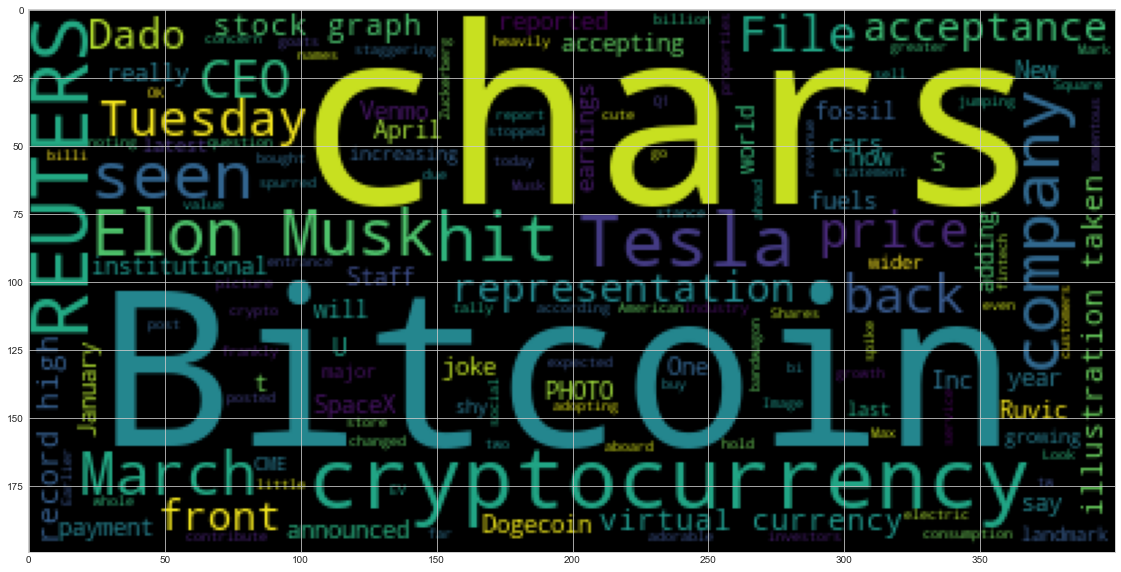

In [85]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate((btc_df["text"].str.cat()))
plt.imshow(btc_wc)

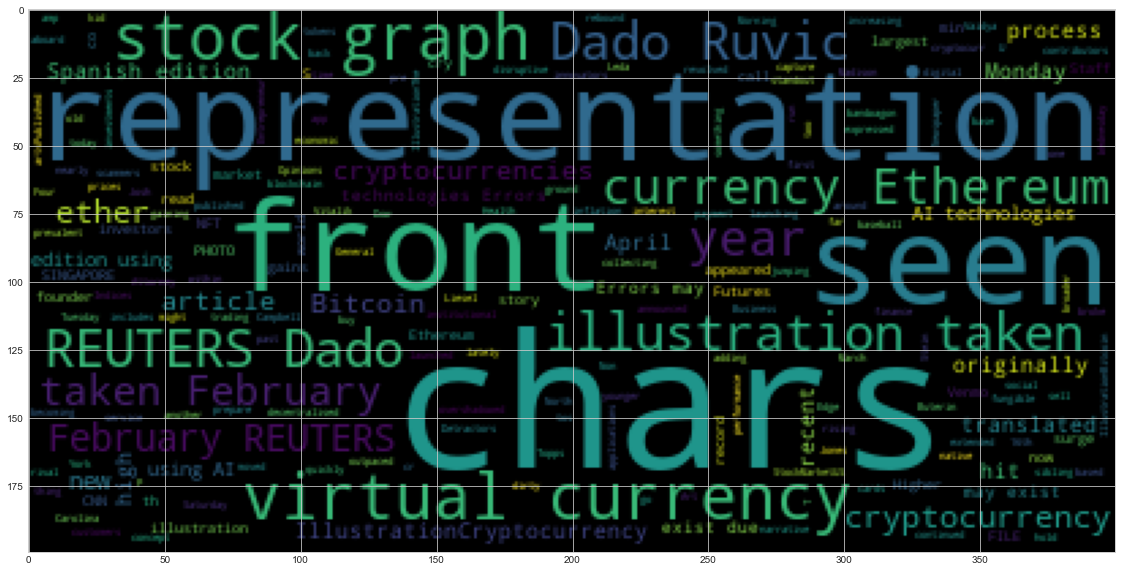

In [86]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate((eth_df["text"].str.cat()))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [87]:
import spacy
from spacy import displacy

In [88]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [89]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [90]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df["text"].str.cat()

In [92]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [93]:
# Render the visualization
displacy.render(btc_doc, style = "ent")

In [96]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
Tesla ORG
Elon Musk PERSON
a momentous year DATE
2020 DATE
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
LONDON GPE
April 13 DATE
Reuters ORG
62,575 MONEY
Tuesday DATE
2021 DATE
Reuters ORG
Bitcoin PERSON
March 15, 2021 DATE
Groot GPE
Daily Crunch WORK_OF_ART
April 23, 2021 DATE
Meet Disney Imagineering ORG
Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ruvic/File PhotoTesla Inc PERSON
Wednesday DATE
Elon Musk PERSON
Bitcoin ORG
Bitcoin PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric GaillardBitcoin PERSON
6.54% PERCENT
57,098.08 MONEY
Friday DATE
3,504.11 MONEY
Dogecoin GPE
65,000 MONEY
last week DAT

---

### Ethereum NER

In [97]:
# Concatenate all of the Ethereum text together
eth_text = eth_df["text"].str.cat()

In [98]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"


In [99]:
# Render the visualization
displacy.render(eth_doc, style = "ent")

In [100]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Wednesday DATE
Topps GPE
first ORDINAL
NFT ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
February 19, 2021 DATE
Dado Ruvic/IllustrationBitcoin PERSON
two CARDINAL
27, 2021 DATE
Entrepreneur ORG
this year DATE
one CARDINAL
Year after year DATE
Bitcoin PERSON
March 15, 2021 DATE
Dado Ruvic PERSON
Dow Jones Indices ORG
Ethereum ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurren

---